Question 1 - Occupation
Introduction: Special thanks to: https://github.com/justmarkham for sharing the dataset and materials. Occupations Step 1. Import the necessary libraries Step 2. Import the dataset from this address. Step 3. Assign it to a variable called users Step 4. Discover what is the mean age per occupation Step 5. Discover the Male ratio per occupation and sort it from the most to the least Step 6. For each occupation, calculate the minimum and maximum ages Step 7. For each combination of occupation and sex, calculate the mean age Step 8. For each occupation present the percentage of women and men

In [1]:
import pandas as pd
import urllib


In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'


In [3]:
users = pd.read_csv(url)
arr = users['user_id|age|gender|occupation|zip_code'].str.split('|',expand = True)
users['user_id'] = arr[0]
users['age']=arr[1]
users['gender']=arr[2]
users['occupation']=arr[3]
users['zip_code']=arr[4]
users.drop(columns = ['user_id|age|gender|occupation|zip_code'], inplace = True)
users['age']=users['age'].astype(int)
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
users.groupby('occupation').mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [5]:
maleRatio = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)

total = maleRatio[['F', 'M']].sum(axis=1)
maleRatio['MaleRatio'] = 100 * maleRatio['M'] / total

maleRatio = maleRatio['MaleRatio'].sort_values(ascending=False)
# result
maleRatio


occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
Name: MaleRatio, dtype: float64

In [6]:
users.groupby('occupation')['age'].agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [7]:
users.groupby(['occupation', 'gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [8]:
GenderOccupation = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occupationCount = users.groupby(['occupation']).agg('count')
occupationCount
GenderPercentage = GenderOccupation.div(occupationCount, level = "occupation") * 100
GenderPercentage.loc[:,'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

Question 2 - Euro Teams
Euro Teams Step 1. Import the necessary libraries Step 2. Import the dataset from this address Step 3. Assign it to a variable called euro12 Step 4. Select only the Goal column Step 5. How many team participated in the Euro2012? Step 6. What is the number of columns in the dataset? Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline Step 8. Sort the teams by Red Cards, then to Yellow Cards Step 9. Calculate the mean Yellow Cards given per Team Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G Step 12. Select the first 7 columns Step 13. Select all columns except the last 3 Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [9]:
import pandas as pd


In [10]:
url1 = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'


In [11]:
euro12 = pd.read_csv(url1)
euro12.head()


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [12]:
euro12["Goals"]

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [13]:
teamsCount = len(euro12)
teamsCount

16

In [14]:
euro12.shape[1]


35

In [15]:
discipline=pd.DataFrame({'Team':euro12['Team'], 'Yellow Cards': euro12['Yellow Cards'],'Red Cards': euro12['Red Cards']})
discipline


,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [16]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = True)

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [17]:
perteam= pd.DataFrame(euro12.groupby(['Team'])['Yellow Cards'].mean())
perteam


,Yellow Cards
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


In [18]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [19]:
gteams=euro12[euro12['Team'].str.startswith('G')]
gteams


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [20]:
euro12[euro12.columns[0:7]]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [21]:
euro12.iloc[:,0:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [22]:
Countries = euro12[euro12.Team.isin(['England','Italy','Russia'])]
Countries[['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


Question 3 - Housing
Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows: • The first a random number from 1 to 4 • The second a random number from 1 to 3 • The third a random number from 10,000 to 30,000 
Step 3. Create a DataFrame by joinning the Series by column 
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true? 
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [23]:
import numpy as np
import pandas as pd

In [24]:
firstno = pd.Series(np.random.randint(1, high=5, size=100))
print (firstno)

0     3
1     2
2     2
3     2
4     4
     ..
95    3
96    2
97    4
98    1
99    3
Length: 100, dtype: int32


In [25]:
secondno = pd.Series(np.random.randint(1, high=4, size=100))
print (secondno)

0     1
1     2
2     1
3     2
4     3
     ..
95    2
96    1
97    3
98    3
99    1
Length: 100, dtype: int32


In [26]:
thirdno = pd.Series(np.random.randint(10000, high=30001, size=100))
print(thirdno)

0     16895
1     13140
2     14328
3     29413
4     13502
      ...  
95    24519
96    12814
97    12545
98    15807
99    19874
Length: 100, dtype: int32


In [27]:
DF = pd.DataFrame({'firstno': firstno,'secondno':secondno,'thirdno':thirdno})
DF.head()


,firstno,secondno,thirdno
0,3,1,16895
1,2,2,13140
2,2,1,14328
3,2,2,29413
4,4,3,13502


In [28]:
newcol = DF.rename(columns = {'firstno':'bedrs','secondno':'bathrs','thirdno':'price_sqr_meter'})
newcol.head()

,bedrs,bathrs,price_sqr_meter
0,3,1,16895
1,2,2,13140
2,2,1,14328
3,2,2,29413
4,4,3,13502


In [29]:
df_new = newcol.bedrs.astype(str).str.cat(newcol.bathrs.astype(str)).str.cat(newcol.price_sqr_meter.astype(str))
df_new.columns = ['bigcolumn']
df_new

0     3116895
1     2213140
2     2114328
3     2229413
4     4313502
       ...   
95    3224519
96    2112814
97    4312545
98    1315807
99    3119874
Name: bedrs, Length: 100, dtype: object

In [30]:
df_new = df_new.reset_index(drop=True)

df_new.reset_index()

df_new.reindex(index=range(0,299))

0      3116895
1      2213140
2      2114328
3      2229413
4      4313502
        ...   
294        NaN
295        NaN
296        NaN
297        NaN
298        NaN
Name: bedrs, Length: 299, dtype: object

Question 4 - Wind Statistics

Wind Statistics The data have been modified to contain some missing values, identified by NaN. Using pandas should make this exercise easier, in particular for the bonus question. You should be able to perform all of these operations without using a for loop or other looping construct. The data in 'wind.data' has the following format: Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL 61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04 61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83 61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71 The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns]. 
Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below. 
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset. 
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location. 
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day. 
Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location. 
Step 14. Downsample the record to a weekly frequency for each location. 
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [31]:
import pandas as pd
import numpy as np


In [32]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', 
                  sep = '\s+')
data.head()


,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [33]:
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])

#re-arrange cols
data = data[['Date','RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']]
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [34]:
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000,
                        data.Date,data.Date - pd.offsets.DateOffset(years=100))
data.head()


,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [35]:
data = data.set_index('Date')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [36]:
data.isna().sum()


RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [37]:
data = data.dropna()
data.notna().sum().sum()


78552

In [38]:
mean_wind_speed = data.mean().mean()
mean_wind_speed

10.222465245951712

In [39]:
loc_stats = pd.DataFrame()
 
loc_stats['min'] = data.min()
loc_stats['max'] = data.max() 
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()
 
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.359979,5.618805
VAL,0.21,33.37,10.640267,5.268695
ROS,1.50,33.84,11.656396,5.007805
KIL,0.00,28.46,6.298587,3.600942
SHA,0.13,37.54,10.448923,4.933988
BIR,0.00,26.16,7.085066,3.967735
DUB,0.00,30.37,9.793006,4.978030
CLA,0.00,31.08,8.486601,4.498299
MUL,0.00,25.88,8.490257,4.165947
CLO,0.04,28.21,8.696705,4.500488


In [40]:
day_stats = pd.DataFrame()

day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)

day_stats


,min,max,mean,std
Date,,,,
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
1961-01-06,4.42,13.21,8.240000,2.998063
1961-01-07,4.96,14.29,10.385000,3.072114
1961-01-08,5.91,16.62,10.487500,3.547237
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [41]:
data['date'] = data.index
data['month'] = data['date'].apply(lambda date: date.month)
data['year'] = data['date'].apply(lambda date: date.year)
data['day'] = data['date'].apply(lambda date: date.day)
 
january = data.query('month == 1')
january.loc[:,'RPT':"MAL"].mean()


C:\Users\Rakshit Wilson\AppData\Local\Temp\ipykernel_35132\3035174125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = data.index
C:\Users\Rakshit Wilson\AppData\Local\Temp\ipykernel_35132\3035174125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['date'].apply(lambda date: date.month)
C:\Users\Rakshit Wilson\AppData\Local\Temp\ipykernel_35132\3035174125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

In [42]:
data.query('month == 1 and day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Date,,,,,,,,,,,,,,,,
1962-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92,1962-01-01,1,1962,1
1963-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13,1963-01-01,1,1963,1
1964-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00,1964-01-01,1,1964,1
1965-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41,1965-01-01,1,1965,1
1966-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79,1966-01-01,1,1966,1
1967-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91,1967-01-01,1,1967,1
1968-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29,1968-01-01,1,1968,1
1969-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71,1969-01-01,1,1969,1
1970-01-01,9.59,2.96,11.79,3.42,6.13,4.08,9.00,4.46,7.29,3.50,7.33,13.00,1970-01-01,1,1970,1


In [43]:
data2 = data
data2.groupby([data2['date'].dt.year.rename('year'),data2['date'].dt.month.rename('month')]).sum()


RPT     VAL     ROS     KIL     SHA     BIR     DUB     CLA  \
year month                                                                   
1961 1      377.16  291.86  336.97  177.84  273.24  212.53  270.48  225.44   
     2      426.45  390.97  376.22  240.31  358.23  283.00  308.57  305.40   
     3      287.82  299.63  281.34  191.72  277.17  231.66  245.93  251.89   
     4      321.68  282.83  299.94  174.92  253.05  194.85  207.76  212.84   
     5      280.69  237.88  295.10  167.79  265.45  185.75  214.08  229.79   
...            ...     ...     ...     ...     ...     ...     ...     ...   
1978 8      299.00  256.04  280.00  139.59  228.41  183.99  175.16  167.95   
     9      327.41  326.85  319.05  171.75  311.16  278.35  323.71  287.49   
     10     306.83  268.80  288.17  146.36  264.28  210.00  251.58  227.47   
     11     484.55  444.08  405.24  219.52  344.25  262.29  344.77  289.72   
     12     501.44  426.19  484.69  219.94  353.36  286.49  374.40  316.04   

               MUL     CLO     BEL     MAL  month   year  day  
year month                                                     
1961 1      216.41  246.75  345.02  372.88     26  50986  443  
     2      305.46  328.29  472.29  397.82     52  50986  359  
     3      272.70  296.72  433.79  416.31     81  52947  425  
     4      220.27  217.11  334.42  308.35    120  58830  465  
     5      227.38  238.97  333.54  333.53    140  54908  438  
...            ...     ...     ...     ...    ...    ...  ...  
1978 8      224.48  171.64  324.47  373.68    248  61318  496  
     9      302.08  268.17  470.41  581.74    270  59340  465  
     10     257.23  255.56  427.08  531.65    310  61318  496  
     11     321.04  320.28  522.14  621.69    330  59340  465  
     12     329.12  341.89  429.65  662.52    372  61318  496  

[216 rows x 15 columns]

In [44]:
data3 = data
data3.groupby([data3['date'].dt.year.rename('year'),data3['date'].dt.month.rename('month'), data3['date'].dt.week.rename('week')]).sum()

C:\Users\Rakshit Wilson\AppData\Local\Temp\ipykernel_35132\3303405030.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data3.groupby([data3['date'].dt.year.rename('year'),data3['date'].dt.month.rename('month'), data3['date'].dt.week.rename('week')]).sum()


RPT     VAL     ROS    KIL     SHA    BIR     DUB    CLA  \
year month week                                                                
1961 1     1      61.58   52.04   50.25  28.29   42.53  31.21   54.68  29.66   
           2      87.28   62.77   83.71  32.41   51.46  35.51   52.75  47.74   
           3      72.60   57.00   70.09  25.76   53.80  41.63   46.97  43.75   
           4     119.28   89.08  105.29  71.50   97.95  84.10   86.70  85.87   
           5      36.42   30.97   27.63  19.88   27.50  20.08   29.38  18.42   
...                 ...     ...     ...    ...     ...    ...     ...    ...   
1978 12    48     56.20   50.34   56.08  29.50   44.17  41.79   51.33  38.84   
           49    145.18  134.33  119.24  68.44  107.01  89.42  101.06  87.42   
           50    117.31  102.85  104.91  48.42   79.78  50.91   71.46  55.77   
           51     78.09   56.06   92.21  28.03   54.78  44.03   54.59  60.67   
           52    104.66   82.61  112.25  45.55   67.62  60.34   95.96  73.34   

                   MUL    CLO     BEL     MAL  month   year  day  
year month week                                                   
1961 1     1     40.75  42.14   57.08   66.13      5   9805   30  
           2     39.99  53.00   77.88   77.17      7  13727   84  
           3     35.35  40.16   59.96   62.08      6  11766  115  
           4     79.90  89.53  118.80  134.33      6  11766  153  
           5     20.42  21.92   31.30   33.17      2   3922   61  
...                ...    ...     ...     ...    ...    ...  ...  
1978 12    48    41.71  46.54   48.76   71.40     36   5934    6  
           49    97.09  98.58  129.62  161.43     84  13846   49  
           50    64.18  59.96   77.72  108.94     84  13846   98  
           51    50.06  56.51   82.92  132.84     84  13846  147  
           52    76.08  80.30   90.63  187.91     84  13846  196  

[1123 rows x 15 columns]

In [45]:
weekly = pd.DataFrame()

weekly['min'] = data.first("365 D").query('day == 7').min(axis=1)
weekly['max'] = data.first("365 D").query('day == 7').max(axis=1)
weekly['mean'] = data.first("365 D").query('day == 7').mean(axis=1)
weekly['std'] = data.first("365 D").query('day == 7').std(axis=1)

weekly

C:\Users\Rakshit Wilson\AppData\Local\Temp\ipykernel_35132\3956013278.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  weekly['min'] = data.first("365 D").query('day == 7').min(axis=1)
C:\Users\Rakshit Wilson\AppData\Local\Temp\ipykernel_35132\3956013278.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  weekly['max'] = data.first("365 D").query('day == 7').max(axis=1)
C:\Users\Rakshit Wilson\AppData\Local\Temp\ipykernel_35132\3956013278.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  weekly['mean'] = data.first("365 D").query('day == 7').mean(ax

,min,max,mean,std
Date,,,,
1961-01-07,1.00,1961.0,139.574667,503.895729
1961-02-07,2.00,1961.0,142.078667,503.206090
1961-03-07,3.00,1961.0,137.852000,504.368371
1961-04-07,3.67,1961.0,136.616000,504.706993
1961-05-07,5.00,1961.0,146.620000,501.967636
1961-06-07,6.00,1961.0,139.958000,503.783885
1961-08-07,2.88,1961.0,135.782000,504.935165
1961-09-07,3.92,1961.0,137.382000,504.491777
1961-10-07,3.25,1961.0,138.753333,504.120582


Question 5


Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo. 
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset? 
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns. 
Step 8. How is the dataset indexed? 
Step 9. Which was the most-ordered item? 
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column? 
Step 12. How many items were orderd in total? 
Step 13. • Turn the item price into a float 
• Check the item price type 
• Create a lambda function and change the type of item price
• Check the item price type 
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period? 
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [46]:
import pandas as pd
import numpy as np


In [47]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')

In [48]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [49]:
chipo.shape[0]


4622

In [50]:
chipo.shape[1]


5

In [51]:
list(chipo)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

In [52]:
chipo.index


RangeIndex(start=0, stop=4622, step=1)

In [53]:
ordered_item=chipo.groupby(['item_name'])['quantity'].sum()
print(ordered_item.idxmax())
ordered_item.max()

Chicken Bowl


761

In [54]:
most_ordered = chipo.groupby('choice_description').sum().sort_values('quantity',ascending = False)
most_ordered.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [55]:
chipo['quantity'].sum()


4972

In [56]:
chipo1 = chipo.copy()
chipo1['item_price'] = chipo1['item_price'].str[1:]
chipo1.astype({'item_price':'float64'}).dtypes


order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [57]:
chipo.item_price

0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4622, dtype: object

In [58]:
chipo1 = lambda x: float(x[1:-1])
chipo['item_price'] = chipo['item_price'].apply(chipo1)


In [59]:
chipo.item_price


0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [60]:
chipo['sub_total'] = round(chipo['item_price'] * chipo['quantity'],2)
chipo['sub_total'].sum()


39237.02

In [61]:
number_order = chipo['order_id'].count()
number_order

4622

In [62]:
chipo[['order_id','sub_total']].groupby(by=['order_id']).agg({'sub_total':'sum'})['sub_total'].mean()


21.394231188658654

In [63]:
chipo['item_name'].nunique()


50

Question 6


Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

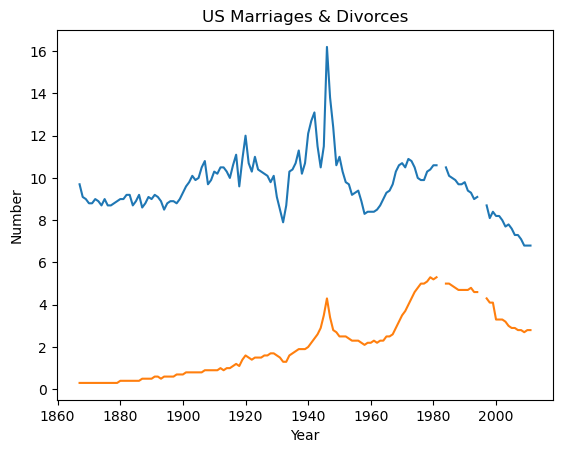

In [73]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import csv

marriage = pd.read_csv('us-marriages-divorces-1867-2014.csv')
columns = marriage.columns.drop(['Marriages','Divorces','Population','Year'])
fig,ax= plt.subplots()
for column in columns:
    ax.plot(marriage['Year'],marriage[column])
ax.set_title('US Marriages & Divorces')
ax.set_xlabel('Year')
ax.set_ylabel('Number')
plt.show()

Question 7


Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!

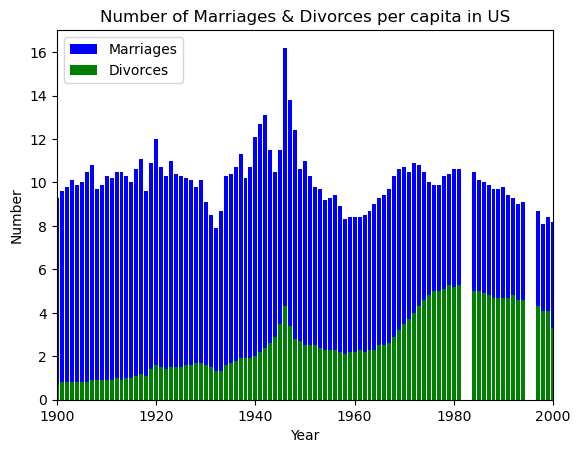

In [74]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import csv

marriage = pd.read_csv('us-marriages-divorces-1867-2014.csv')
plt.bar(marriage['Year'], marriage['Marriages_per_1000'],  color='blue', label='Marriages')
plt.bar(marriage['Year'], marriage['Divorces_per_1000'],  color='green', label='Divorces')
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Number of Marriages & Divorces per capita in US')
plt.legend()
plt.gca().set_xbound(1900, 2000) 

plt.show()

Question 8


Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

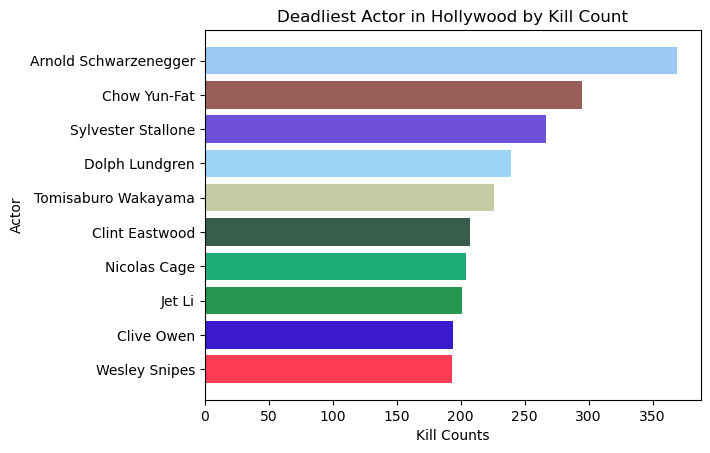

In [75]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import csv
counts = pd.read_csv('actor_kill_counts.csv')
counts.sort_values(by = 'Count', ascending = True, inplace = True)
y = list(counts['Actor'])
x = list(counts['Count'])
colours = ['#FF3D52','#3B19CE','#25974F','#1EAD79','#375E4C','#C5CBA3','#9CD5F6','#6E50D9','#9A5E59','#9BC8F5']
plt.barh(y,x,color=colours)
plt.xlabel('Kill Counts')
plt.ylabel('Actor')
plt.title('Deadliest Actor in Hollywood by Kill Count')
plt.show()


Question 


Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.



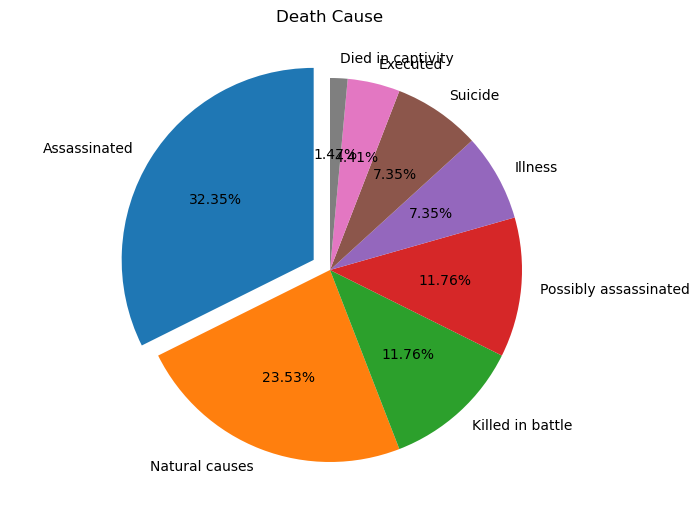

In [76]:
#import numpy as np
import pandas as pd
#import os
import matplotlib.pyplot as plt

roman_data = pd.read_csv('roman-emperor-reigns.csv')

data = roman_data.groupby(['Cause_of_Death']).Cause_of_Death.agg('count').to_frame('Count').reset_index()
data = data.sort_values(by='Count', ascending=False)
labels = data['Cause_of_Death'].unique()


counts = roman_data['Cause_of_Death'].value_counts()
l = list(counts)
fig = plt.figure()
explode = (0.1,0,0,0,0,0,0,0)
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
plt.title('Death Cause')
ax.pie(l, labels = labels,explode = explode, autopct='%1.2f%%',startangle=90)
plt.show()



Question 10

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

Text(0, 0.5, 'Computer Science Doctorates Awarded (US)')

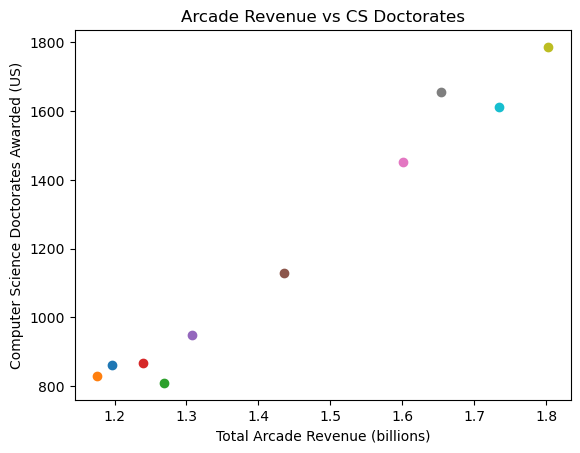

In [77]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


arcade_vs_csphd = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

fig4,ax4 = plt.subplots()
for i in range (len(arcade_vs_csphd['Total Arcade Revenue (billions)'])):
    ax4.scatter(arcade_vs_csphd['Total Arcade Revenue (billions)'][i],arcade_vs_csphd['Computer Science Doctorates Awarded (US)'][i])
ax4.set_title('Arcade Revenue vs CS Doctorates')
ax4.set_xlabel('Total Arcade Revenue (billions)')
ax4.set_ylabel('Computer Science Doctorates Awarded (US)')
